1.- Cargar librerias

In [34]:
!pip install openpyxl
!pip uninstall pandas_profiling -y
!pip install ydata-profiling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

2.- Cargar pandas

In [35]:
# Cargar datos
df = pd.read_excel('/content/Exani_sn1.xlsx',
                   engine= 'openpyxl') # Changed the engine to 'openpyxl'

3.- Inspeccionar

In [36]:
df.head()

,DIA_NAC,MES_NAC,ANO_NAC,SEXO,ENTI_NAC,LI_MAD,LI_PAD,IMP_CAM,IMP_ESC,IMP_ECU,...,PCNE,PPMA,PPAN,PCC_EL,PCC_CL,CAT_IPMA,CAT_IPAN,CAT_ICC_EL,CAT_ICC_CL,class
0,26,5,1996,1,21,2,2,2,2,2,...,E,D,D,F,H,C,C,D,E,NO SUFICIENTE
1,20,1,1996,2,29,2,2,2,2,2,...,F,F,F,F,G,D,E,E,E,NO SUFICIENTE
2,8,9,1996,1,29,2,2,2,2,2,...,C,C,C,D,C,C,B,C,C,NIVEL SATISFACTORIO
3,27,10,1995,1,29,2,2,2,2,2,...,A,S,B,S,B,A,B,A,B,NIVEL SOBRESALIENTE
4,19,3,1996,1,29,1,1,2,2,2,...,C,C,B,D,B,B,B,C,B,NIVEL SATISFACTORIO


In [37]:
# Tipos de datos y cantidad de no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 95 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DIA_NAC     813 non-null    int64  
 1   MES_NAC     813 non-null    int64  
 2   ANO_NAC     813 non-null    int64  
 3   SEXO        813 non-null    int64  
 4   ENTI_NAC    813 non-null    int64  
 5   LI_MAD      813 non-null    int64  
 6   LI_PAD      813 non-null    int64  
 7   IMP_CAM     813 non-null    int64  
 8   IMP_ESC     813 non-null    int64  
 9   IMP_ECU     813 non-null    int64  
 10  IMP_VER     813 non-null    int64  
 11  IMP_LEN     813 non-null    int64  
 12  IMP_EMO     813 non-null    int64  
 13  IMP_APR     813 non-null    int64  
 14  EDO_PROC    813 non-null    int64  
 15  CVE_PROC    813 non-null    int64  
 16  NOM_PROC    813 non-null    object 
 17  CIU_PROC    813 non-null    object 
 18  ANO_BAC     813 non-null    int64  
 19  REG_PROC    813 non-null    i

Del resultado anterior observamos que no hay valores nulos

In [38]:
## Estadística descriptiva de los valores numéricos
df.describe()

,DIA_NAC,MES_NAC,ANO_NAC,SEXO,ENTI_NAC,LI_MAD,LI_PAD,IMP_CAM,IMP_ESC,IMP_ECU,...,SER_TV,SER_AUTO,SER_BANO,VAC_RM,EDO_REP,ICNE,IPMA,IPAN,ICC_EL,ICC_CL
count,813.000000,813.000000,813.0000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,...,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,15.394834,6.571956,1994.9508,1.297663,27.152522,1.901599,1.902829,1.993850,1.997540,1.988930,...,2.777368,1.627306,2.118081,2.140221,3.493235,1009.675277,1029.859779,1011.852399,1013.269373,983.719557
std,8.812096,3.417039,3.0424,0.457512,4.849596,0.321879,0.335362,0.078229,0.049568,0.104695,...,0.897934,0.801840,0.562218,1.213641,1.865955,82.761351,109.220638,99.072635,92.862749,102.001353
min,1.000000,1.000000,1944.0000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,790.000000,748.000000,748.000000,748.000000,700.000000
25%,8.000000,4.000000,1995.0000,1.000000,29.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,2.000000,1.000000,2.000000,952.000000,964.000000,940.000000,940.000000,916.000000
50%,15.000000,7.000000,1996.0000,1.000000,29.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,1.000000,2.000000,2.000000,3.000000,1000.000000,1036.000000,1012.000000,1012.000000,988.000000
75%,23.000000,10.000000,1996.0000,2.000000,29.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.000000,5.000000,1066.000000,1108.000000,1084.000000,1084.000000,1060.000000
max,31.000000,12.000000,1996.0000,2.000000,31.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,7.000000,1252.000000,1300.000000,1252.000000,1276.000000,1276.000000


In [39]:
#Cantidad de nulos
df.isnull().sum().to_frame("Cantidad de nulos")

,Cantidad de nulos
DIA_NAC,0
MES_NAC,0
ANO_NAC,0
SEXO,0
ENTI_NAC,0
...,...
CAT_IPMA,0
CAT_IPAN,0
CAT_ICC_EL,0
CAT_ICC_CL,0


In [40]:
df['class'].value_counts()

,count
class,
NO SUFICIENTE,390
NIVEL SATISFACTORIO,372
NIVEL SOBRESALIENTE,51


In [46]:
df.describe()

,DIA_NAC,MES_NAC,ANO_NAC,SEXO,ENTI_NAC,LI_MAD,LI_PAD,IMP_CAM,IMP_ESC,IMP_ECU,...,SER_TV,SER_AUTO,SER_BANO,VAC_RM,EDO_REP,ICNE,IPMA,IPAN,ICC_EL,ICC_CL
count,813.000000,813.000000,813.0000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,...,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,15.394834,6.571956,1994.9508,1.297663,27.152522,1.901599,1.902829,1.993850,1.997540,1.988930,...,2.777368,1.627306,2.118081,2.140221,3.493235,1009.675277,1029.859779,1011.852399,1013.269373,983.719557
std,8.812096,3.417039,3.0424,0.457512,4.849596,0.321879,0.335362,0.078229,0.049568,0.104695,...,0.897934,0.801840,0.562218,1.213641,1.865955,82.761351,109.220638,99.072635,92.862749,102.001353
min,1.000000,1.000000,1944.0000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,790.000000,748.000000,748.000000,748.000000,700.000000
25%,8.000000,4.000000,1995.0000,1.000000,29.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,2.000000,1.000000,2.000000,952.000000,964.000000,940.000000,940.000000,916.000000
50%,15.000000,7.000000,1996.0000,1.000000,29.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,1.000000,2.000000,2.000000,3.000000,1000.000000,1036.000000,1012.000000,1012.000000,988.000000
75%,23.000000,10.000000,1996.0000,2.000000,29.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.000000,5.000000,1066.000000,1108.000000,1084.000000,1084.000000,1060.000000
max,31.000000,12.000000,1996.0000,2.000000,31.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,7.000000,1252.000000,1300.000000,1252.000000,1276.000000,1276.000000


4.- Limpieza de datos

In [47]:
#Eliminar datos duplicados
df.dropna(inplace=True)
df.head()

,DIA_NAC,MES_NAC,ANO_NAC,SEXO,ENTI_NAC,LI_MAD,LI_PAD,IMP_CAM,IMP_ESC,IMP_ECU,...,PCNE,PPMA,PPAN,PCC_EL,PCC_CL,CAT_IPMA,CAT_IPAN,CAT_ICC_EL,CAT_ICC_CL,class
0,26,5,1996,1,21,2,2,2,2,2,...,E,D,D,F,H,C,C,D,E,NO SUFICIENTE
1,20,1,1996,2,29,2,2,2,2,2,...,F,F,F,F,G,D,E,E,E,NO SUFICIENTE
2,8,9,1996,1,29,2,2,2,2,2,...,C,C,C,D,C,C,B,C,C,NIVEL SATISFACTORIO
3,27,10,1995,1,29,2,2,2,2,2,...,A,S,B,S,B,A,B,A,B,NIVEL SOBRESALIENTE
4,19,3,1996,1,29,1,1,2,2,2,...,C,C,B,D,B,B,B,C,B,NIVEL SATISFACTORIO


In [48]:
# Verificar duplicados
print("Número de duplicados:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Número de duplicados: 0


In [49]:
# Verificar cambios
print("Tamaño del dataset tras limpieza:", df.shape)
print("Primeras filas:")
print(df.head())

Tamaño del dataset tras limpieza: (813, 95)
Primeras filas:
   DIA_NAC  MES_NAC  ANO_NAC  SEXO  ENTI_NAC  LI_MAD  LI_PAD  IMP_CAM  \
0       26        5     1996     1        21       2       2        2   
1       20        1     1996     2        29       2       2        2   
2        8        9     1996     1        29       2       2        2   
3       27       10     1995     1        29       2       2        2   
4       19        3     1996     1        29       1       1        2   

   IMP_ESC  IMP_ECU  ...  PCNE  PPMA  PPAN  PCC_EL  PCC_CL  CAT_IPMA CAT_IPAN  \
0        2        2  ...     E     D     D       F       H         C        C   
1        2        2  ...     F     F     F       F       G         D        E   
2        2        2  ...     C     C     C       D       C         C        B   
3        2        2  ...     A     S     B       S       B         A        B   
4        2        2  ...     C     C     B       D       B         B        B   

  CAT_ICC_EL  

In [50]:
# Creación de clase mapping
class_mapping = {
    'NO SUFICIENTE': 1,
    'NIVEL SATISFACTORIO': 2,
    'NIVEL SOBRESALIENTE': 3
    # Add more mappings as needed
}

# Create the new column 'class_numeric' using the mapping
df['class_numeric'] = df['class'].map(class_mapping)

# Display the first few rows to verify the new column
print(df.head())

   DIA_NAC  MES_NAC  ANO_NAC  SEXO  ENTI_NAC  LI_MAD  LI_PAD  IMP_CAM  \
0       26        5     1996     1        21       2       2        2   
1       20        1     1996     2        29       2       2        2   
2        8        9     1996     1        29       2       2        2   
3       27       10     1995     1        29       2       2        2   
4       19        3     1996     1        29       1       1        2   

   IMP_ESC  IMP_ECU  ...  PPMA  PPAN  PCC_EL  PCC_CL  CAT_IPMA  CAT_IPAN  \
0        2        2  ...     D     D       F       H         C         C   
1        2        2  ...     F     F       F       G         D         E   
2        2        2  ...     C     C       D       C         C         B   
3        2        2  ...     S     B       S       B         A         B   
4        2        2  ...     C     B       D       B         B         B   

  CAT_ICC_EL CAT_ICC_CL                class  class_numeric  
0          D          E        NO SUFICIEN

5.- Visualización de Datos

a. Análisis Univariado

Exploramos una variable a la vez.

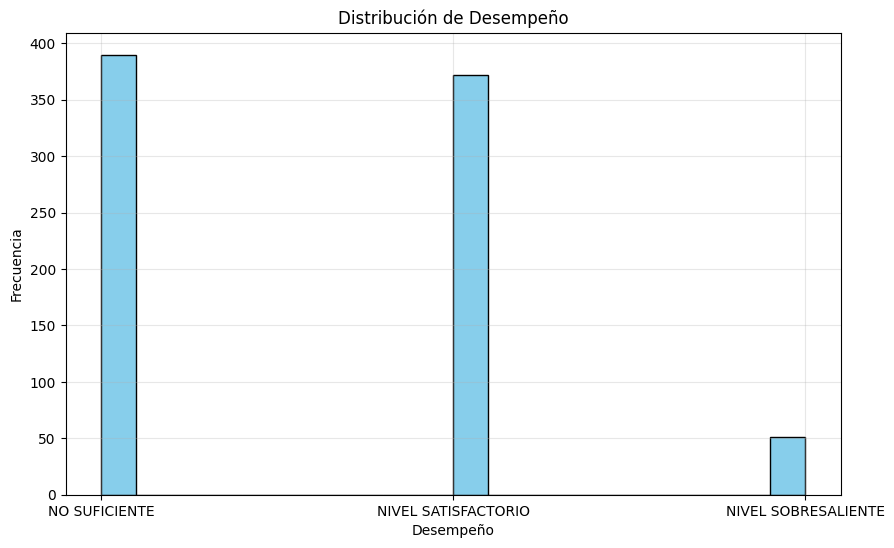

In [51]:
# Histograma :
plt.figure(figsize=(10, 6))
plt.hist(df['class'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Desempeño')
plt.xlabel('Desempeño')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.savefig('release_desempeño.png')

<ipython-input-52-989d1986e02e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ICNE', data=df, palette='viridis')


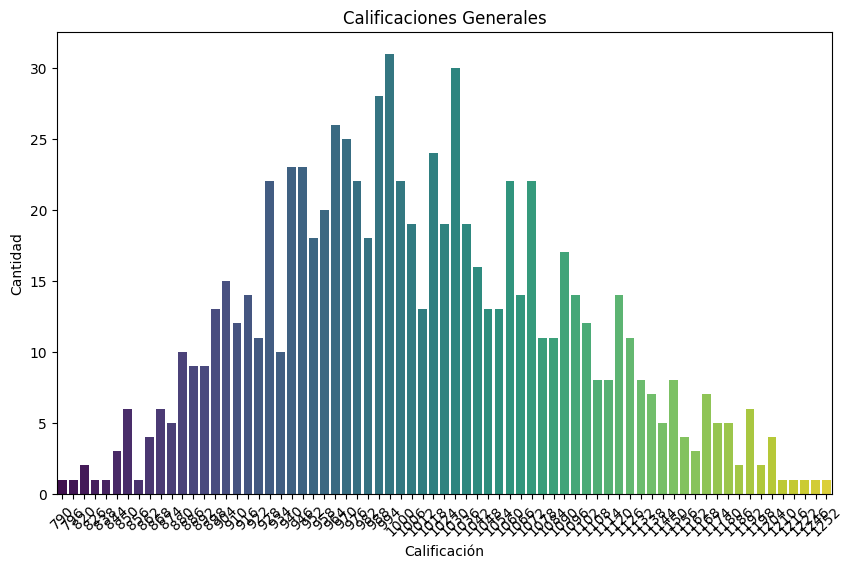

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ICNE', data=df, palette='viridis')
plt.title('Calificaciones Generales')
plt.xlabel('Calificación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.savefig('Calificaiones.png')

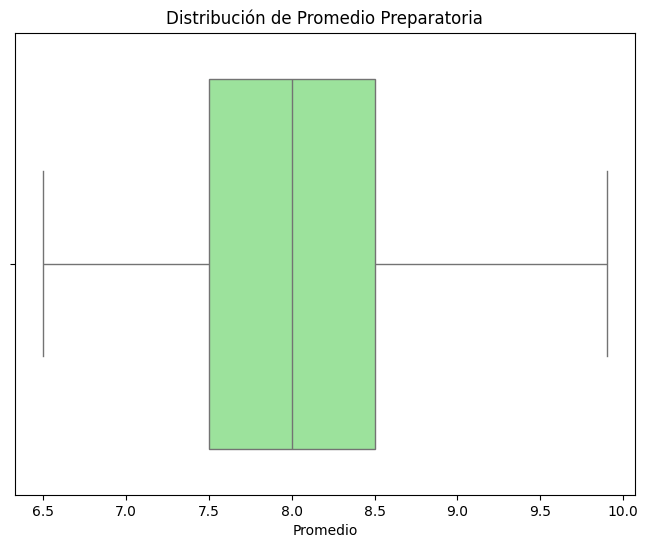

In [53]:
# Boxplot de duración de películas
plt.figure(figsize=(8, 6))
sns.boxplot(x='PROM_BAC', data=df, color='lightgreen')
plt.title('Distribución de Promedio Preparatoria')
plt.xlabel('Promedio')
plt.savefig('promedioprep.png')

In [59]:
df['SEXO'].value_counts()

,count
SEXO,
1,571
2,242


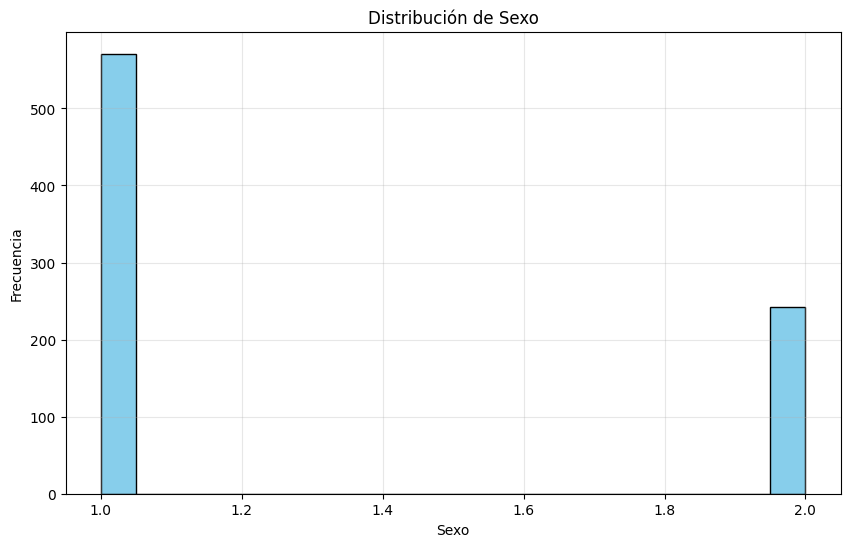

In [60]:
# Histograma :
plt.figure(figsize=(10, 6))
plt.hist(df['SEXO'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.savefig('release_sexo.png')

In [62]:
# Creación de clase mapping
sexo_mapping = {
    1: 'Hombre',
    2: 'Mujer'
    # Add more mappings as needed
}

# Create the new column 'class_numeric' using the mapping
df['sexo_letra'] = df['SEXO'].map(sexo_mapping)

# Display the first few rows to verify the new column
print(df.head())

   DIA_NAC  MES_NAC  ANO_NAC  SEXO  ENTI_NAC  LI_MAD  LI_PAD  IMP_CAM  \
0       26        5     1996     1        21       2       2        2   
1       20        1     1996     2        29       2       2        2   
2        8        9     1996     1        29       2       2        2   
3       27       10     1995     1        29       2       2        2   
4       19        3     1996     1        29       1       1        2   

   IMP_ESC  IMP_ECU  ...  PPAN  PCC_EL  PCC_CL  CAT_IPMA  CAT_IPAN  \
0        2        2  ...     D       F       H         C         C   
1        2        2  ...     F       F       G         D         E   
2        2        2  ...     C       D       C         C         B   
3        2        2  ...     B       S       B         A         B   
4        2        2  ...     B       D       B         B         B   

   CAT_ICC_EL CAT_ICC_CL                class  class_numeric  sexo_letra  
0           D          E        NO SUFICIENTE              1     

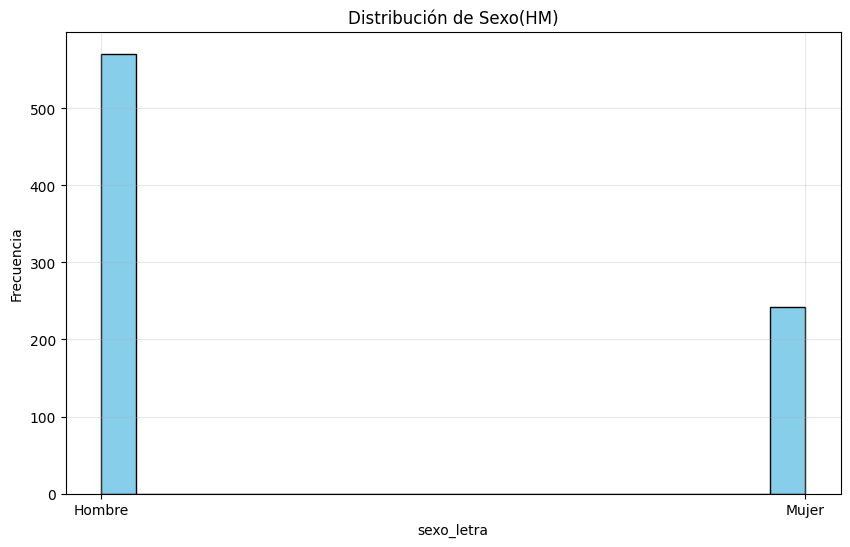

In [90]:
# Histograma :
plt.figure(figsize=(10, 6))
plt.hist(df['sexo_letra'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Sexo(HM)')
plt.xlabel('sexo_letra')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.savefig('release_sexol4.png')

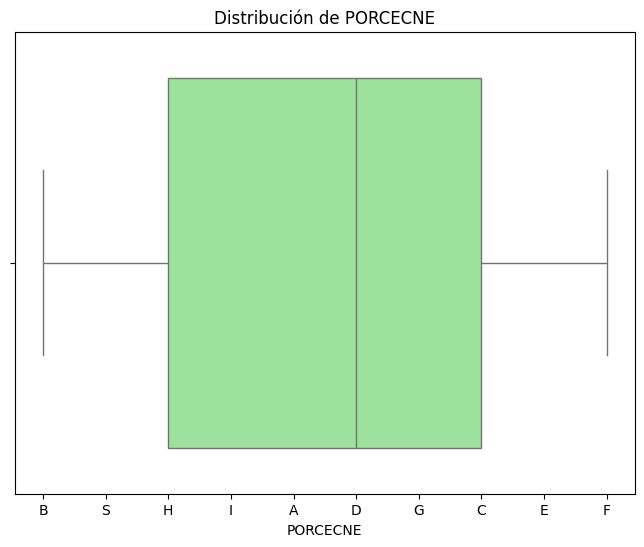

In [66]:
# Boxplot de duración de películas
plt.figure(figsize=(8, 6))
sns.boxplot(x='PORCECNE', data=df, color='lightgreen')
plt.title('Distribución de PORCECNE')
plt.xlabel('PORCECNE')
plt.savefig('PORCECNE.png')

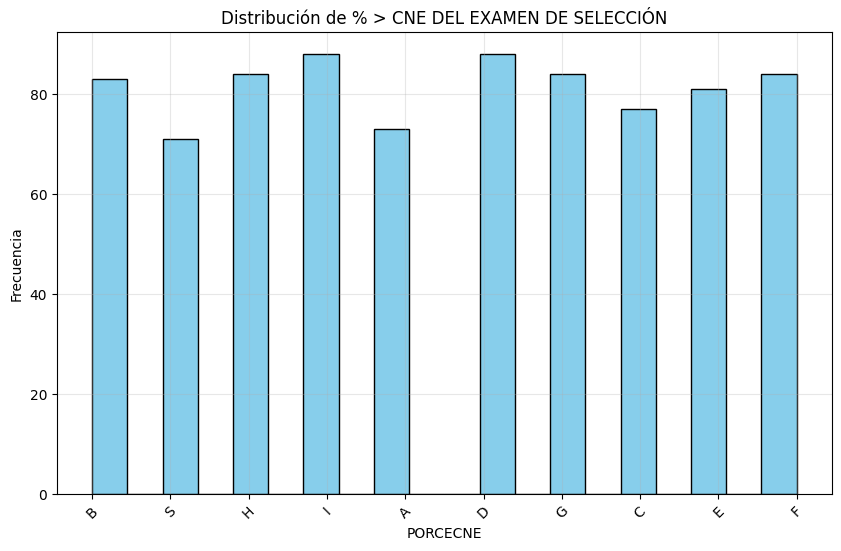

In [69]:
#. % > CNE DEL EXAMEN DE SELECCIÓN
plt.figure(figsize=(10, 6))
plt.hist(df['PORCECNE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de % > CNE DEL EXAMEN DE SELECCIÓN')
plt.xlabel('PORCECNE')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.savefig('release_PORCECNE2.png')

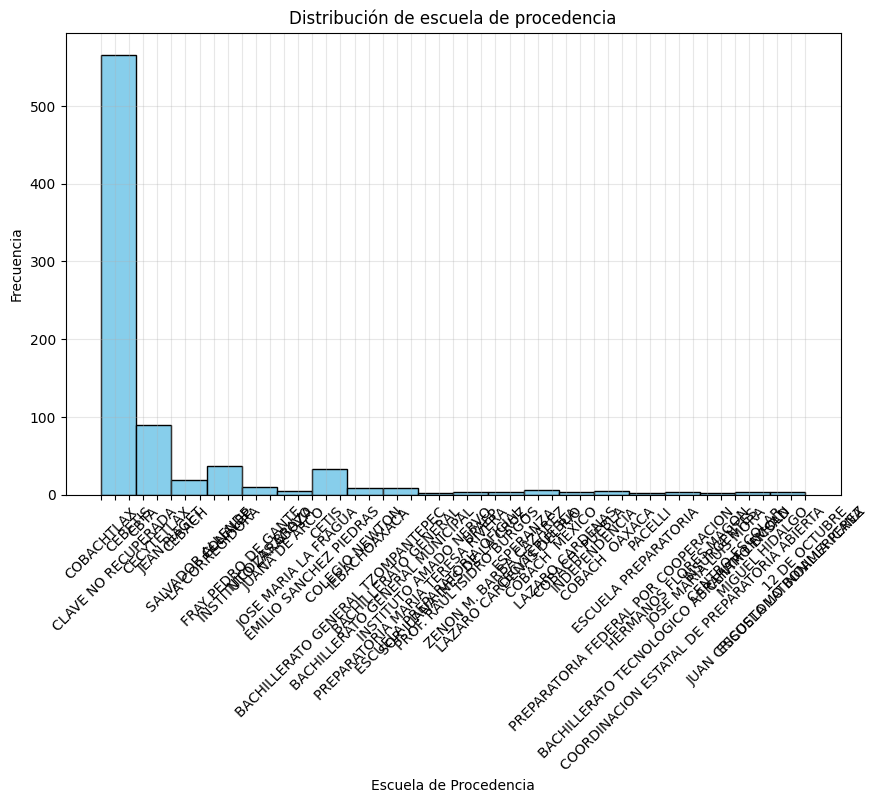

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(df['NOM_PROC'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de escuela de procedencia')
plt.xlabel('Escuela de Procedencia')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.savefig('release_procedencia.png')

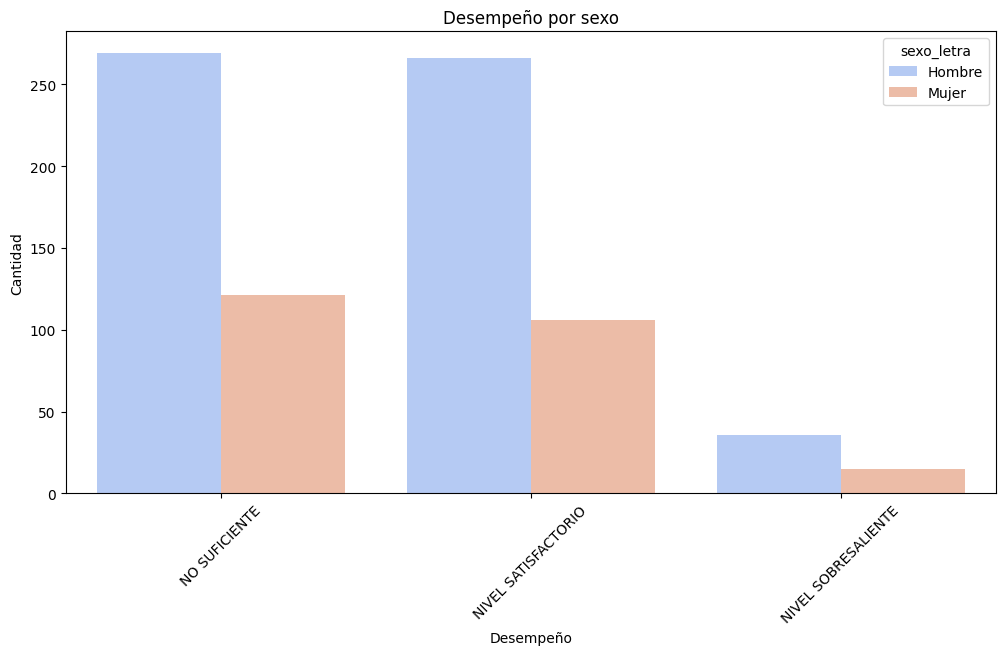

In [71]:
# Claseficiación de desempeño por sexo

#import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='class', hue='sexo_letra', data=df, palette='coolwarm')
plt.title('Desempeño por sexo')
plt.xlabel('Desempeño')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.savefig('sexodesempeño_class.png')

<ipython-input-63-d1aa1d36998f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='sexo_letra', data=df, palette='coolwarm')


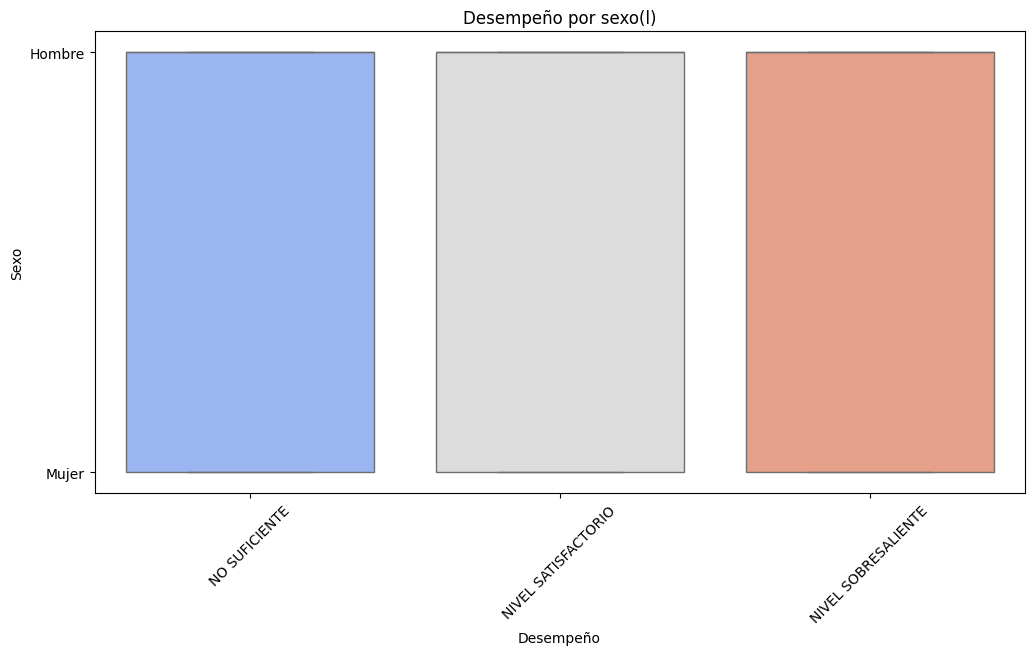

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='sexo_letra', data=df, palette='coolwarm')
plt.title('Desempeño por sexo(l)')
plt.xlabel('Desempeño')
plt.ylabel('Sexo')
plt.xticks(rotation=45)
plt.savefig('sexodesempeñoletra.png')

En esta gráfica, no entiendo por que no me agrupa por sexo

<ipython-input-73-42bf481dd8a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sexo_letra', y='class', data=df, palette='coolwarm')


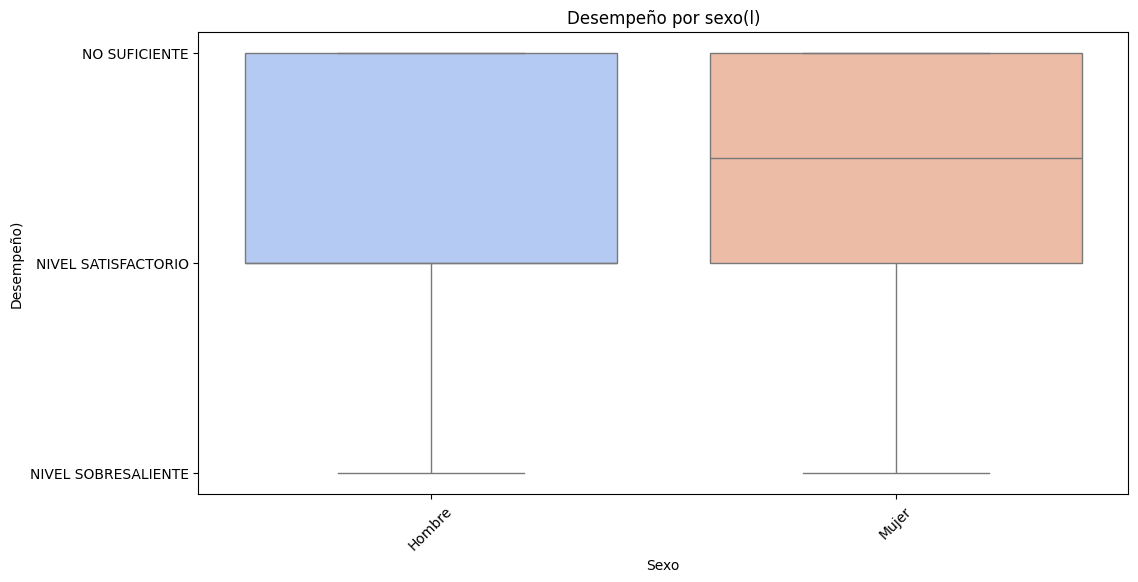

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sexo_letra', y='class', data=df, palette='coolwarm')
plt.title('Desempeño por sexo(l)')
plt.xlabel('Sexo')
plt.ylabel('Desempeño)')
plt.xticks(rotation=45)
plt.savefig('sexodesempeñoletra2.png')

Se puede observar como el promedio de desempeño en hombres es mas cercano a desempeño sobresaliente

<ipython-input-80-03443c39e6bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sexo_letra', y='PERCEN', data=df, palette='coolwarm')


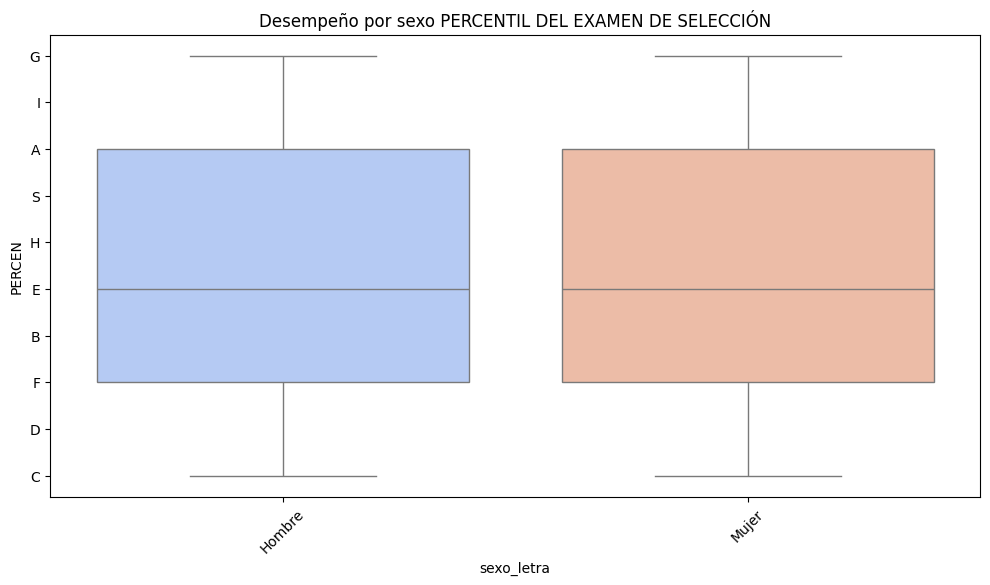

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sexo_letra', y='PERCEN', data=df, palette='coolwarm')
plt.title('Desempeño por sexo PERCENTIL DEL EXAMEN DE SELECCIÓN')
plt.xlabel('sexo_letra')
plt.ylabel('PERCEN')
plt.xticks(rotation=45)
plt.savefig('sexodesempeñoletra3.png')

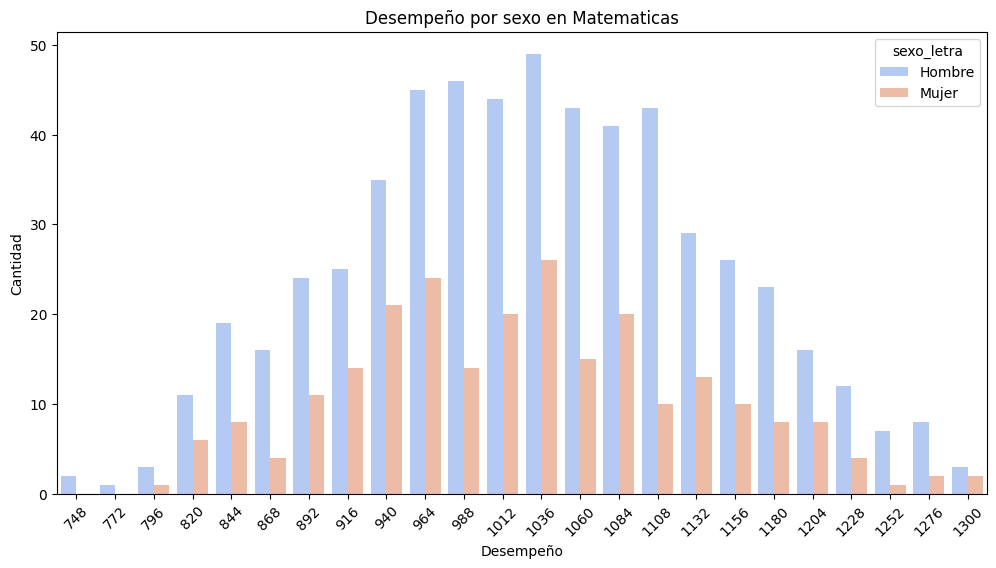

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(x='IPMA', hue='sexo_letra', data=df, palette='coolwarm')
plt.title('Desempeño por sexo en Matematicas')
plt.xlabel('Desempeño')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.savefig('sexodesempeñoMate_count.png')

Podemos observar como los hombres tuvieron un mayor desempeño en el examen matemático

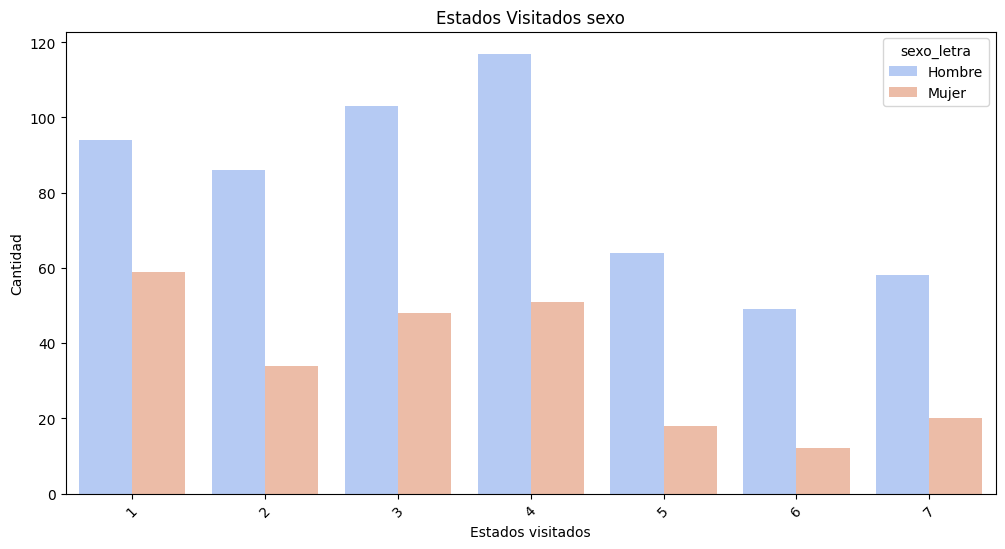

In [91]:
plt.figure(figsize=(12, 6))
sns.countplot(x='EDO_REP', hue='sexo_letra', data=df, palette='coolwarm')
plt.title('Estados Visitados sexo')
plt.xlabel('Estados visitados')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.savefig('estadosvisitados.png')

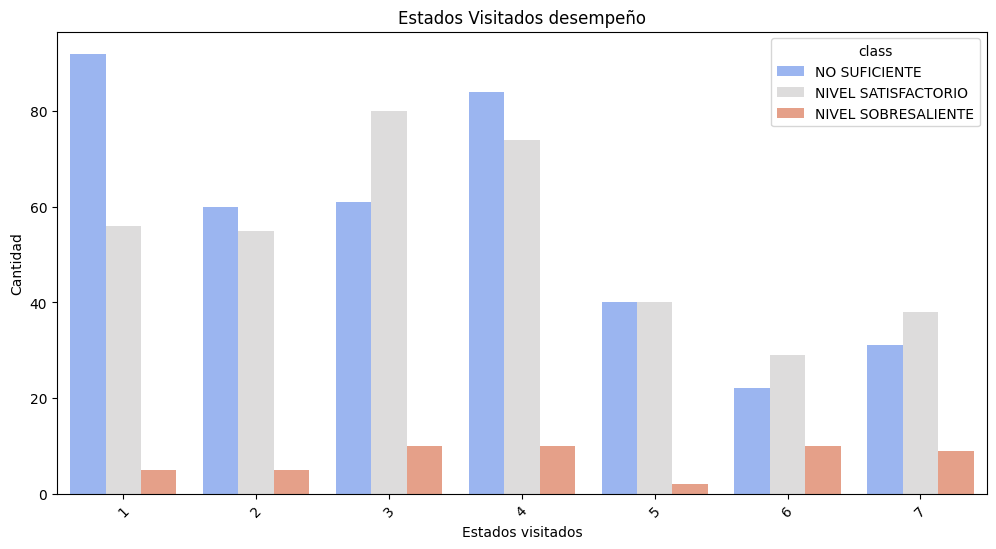

In [92]:
plt.figure(figsize=(12, 6))
sns.countplot(x='EDO_REP', hue='class', data=df, palette='coolwarm')
plt.title('Estados Visitados desempeño')
plt.xlabel('Estados visitados')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.savefig('estadosvisitadosdesempeño.png')

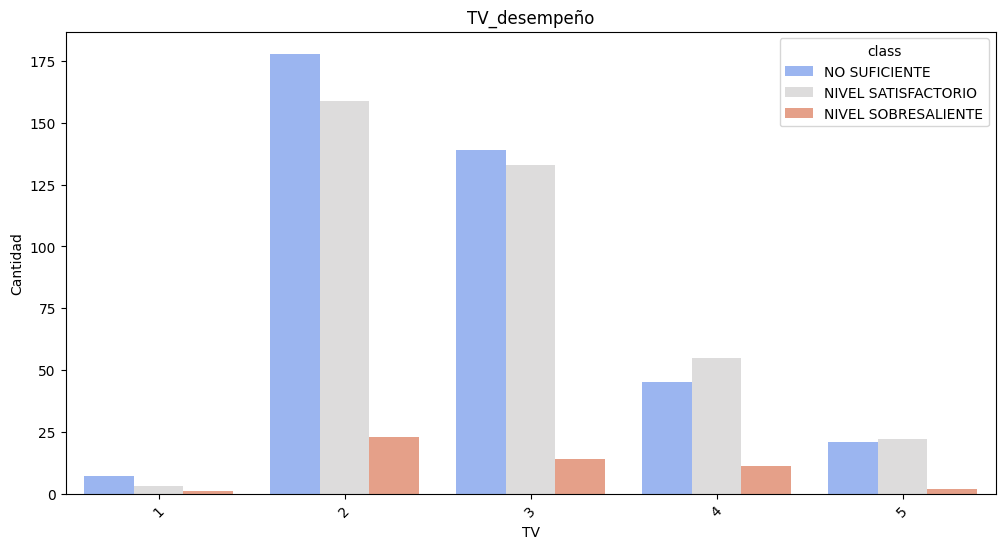

In [93]:
plt.figure(figsize=(12, 6))
sns.countplot(x='SER_TV', hue='class', data=df, palette='coolwarm')
plt.title('TV_desempeño')
plt.xlabel('TV')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.savefig('TV_desempeño.png')

Aca podemos ver, como el acceso a TV, no genera una gran diferencia, en el desempeño

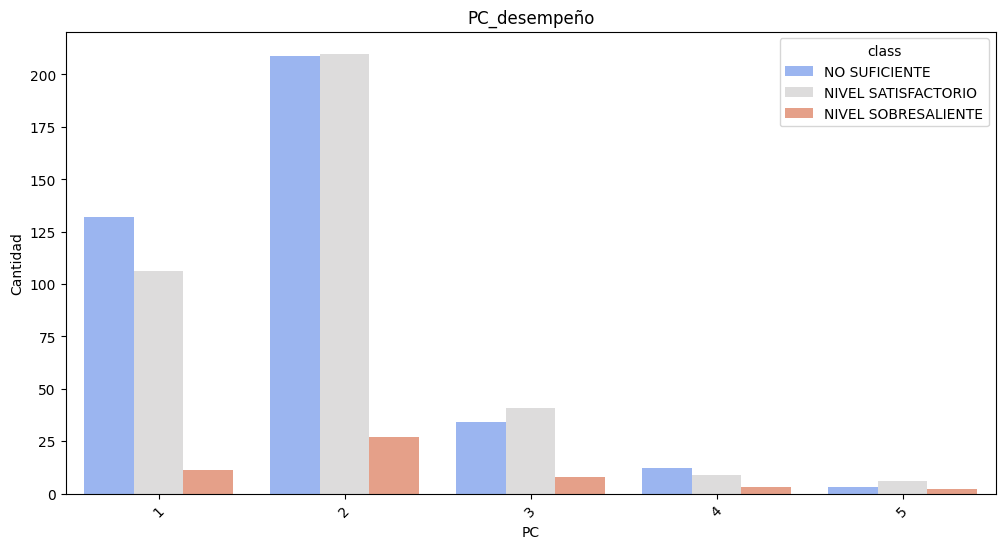

In [94]:
plt.figure(figsize=(12, 6))
sns.countplot(x='BIEN_PC', hue='class', data=df, palette='coolwarm')
plt.title('PC_desempeño')
plt.xlabel('PC')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.savefig('PC_desempeño.png')

Aca podemos ver, como el acceso a compuitadoras, no genera una gran diferencia, en el desempeño

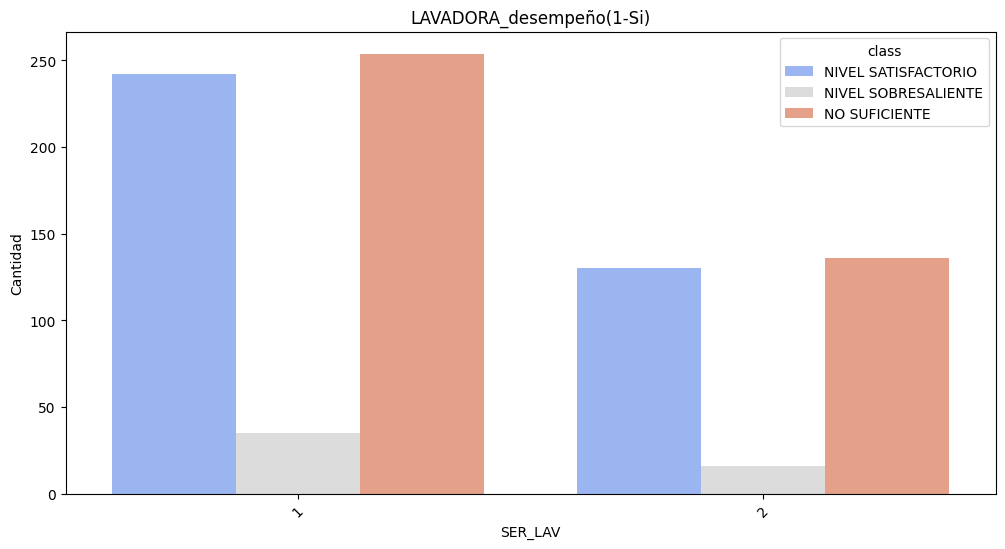

In [96]:
plt.figure(figsize=(12, 6))
sns.countplot(x='SER_LAV', hue='class', data=df, palette='coolwarm')
plt.title('LAVADORA_desempeño(1-Si)')
plt.xlabel('SER_LAV')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.savefig('LAVADORA_desempeño.png')

Aqui podemos ver una gran diferenciación, en el desempeño, relacionado a la existencia de lavadora en casa